# Credpay Finances Business solutions

## 1.0 Libraries and Functions

### 1.1 Libraries

In [1]:
# data manipulation
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#

### 1.2 Functions

In [65]:
# Themes for Jupyter
!jt -t monokai -T -N -kl -cellw 90% -nfs 12
# settings better dataframe and charts visualizations 
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 24
    
    pd.options.display.max_rows = None
    pd.options.display.max_columns = None
    pd.set_option('display.expand_frame_repr', False)
        
    sns.set()
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


## 2.0 Data Extraction

In [3]:
# Using kaggle API for download dataset
!kaggle datasets download -d laotse/credit-risk-dataset
# Extracting file from zip
!unzip credit-risk-dataset.zip 
# creating folder dataset and copy to folder the csv file
!mkdir dataset & !cp credit_risk_dataset.csv dataset/

100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 2.00MB/s]
100%|████████████████████████████████████████| 368k/368k [00:00<00:00, 1.99MB/s]
Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  
/bin/bash: !cp: command not found
mkdir: cannot create directory ‘dataset’: File exists


In [4]:
# loading data as stage dataframe
base_credit = pd.read_csv('dataset/credit_risk_dataset.csv')

## 3.0 Descriptive Analysis

### 3.1 Data Dimention

In [10]:
# Dimension
base_credit.shape

(32581, 12)

### 3.2 NaN

In [6]:
base_credit.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

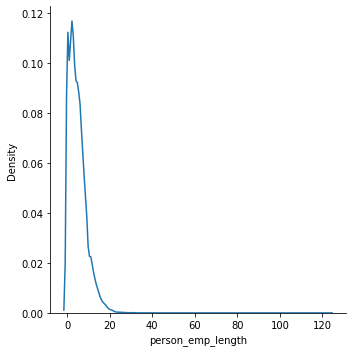

In [41]:
sns.displot(base_credit['person_emp_length'], kind='kde');

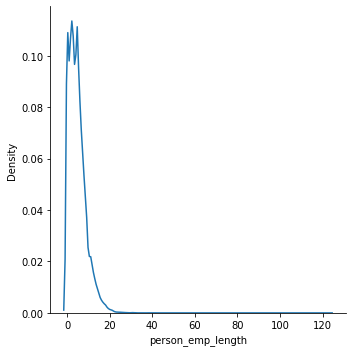

In [7]:
base_credit['person_emp_length'] = base_credit['person_emp_length'].fillna(
                                    base_credit['person_emp_length'].mean())
sns.displot(base_credit['person_emp_length'], kind='kde');

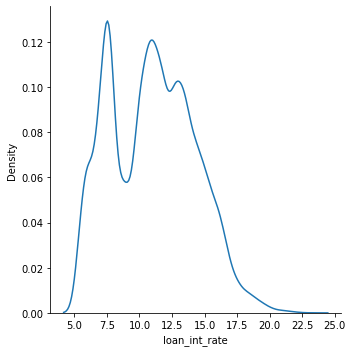

In [35]:
# Visualizing distribution and see if it will better replace per mean or median or zero
sns.displot(base_credit['loan_int_rate'], kind='kde');

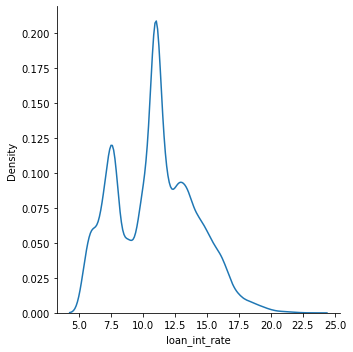

In [8]:
base_credit['loan_int_rate'] = base_credit['loan_int_rate'].fillna(base_credit['loan_int_rate'].mean())
sns.displot(base_credit['loan_int_rate'], kind='kde');

In [9]:
base_credit.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

### 3.3 DataType

In [11]:
base_credit[base_credit['person_income'] >= base_credit['person_income'].max()]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32297,144,6000000,MORTGAGE,12.0,PERSONAL,C,5000,12.73,0,0.0,N,25


In [12]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [13]:
base_credit.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [14]:
base_credit['person_income'] = base_credit['person_income'].astype('float64').copy()
base_credit['loan_amnt'] = base_credit['loan_amnt'].astype('float64').copy()

In [16]:
base_credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  float64
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  float64
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 3.0+ MB


### 3.4 Descriptive Statistics First Level

In [19]:
base_credit.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
person_age,32581.0,NaN,NaN,NaN,27.7346,6.348078,20.0,23.0,26.0,30.0,144.0
person_income,32581.0,NaN,NaN,NaN,66074.84847,61983.119168,4000.0,38500.0,55000.0,79200.0,6000000.0
person_home_ownership,32581,4,RENT,16446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
person_emp_length,32581.0,NaN,NaN,NaN,4.789686,4.085333,0.0,2.0,4.0,7.0,123.0
loan_intent,32581,6,EDUCATION,6453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_grade,32581,7,A,10777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,32581.0,NaN,NaN,NaN,9589.371106,6322.086646,500.0,5000.0,8000.0,12200.0,35000.0
loan_int_rate,32581.0,NaN,NaN,NaN,11.011695,3.081605,5.42,8.49,11.011695,13.11,23.22
loan_status,32581.0,NaN,NaN,NaN,0.218164,0.413006,0.0,0.0,0.0,0.0,1.0
loan_percent_income,32581.0,NaN,NaN,NaN,0.170203,0.106782,0.0,0.09,0.15,0.23,0.83


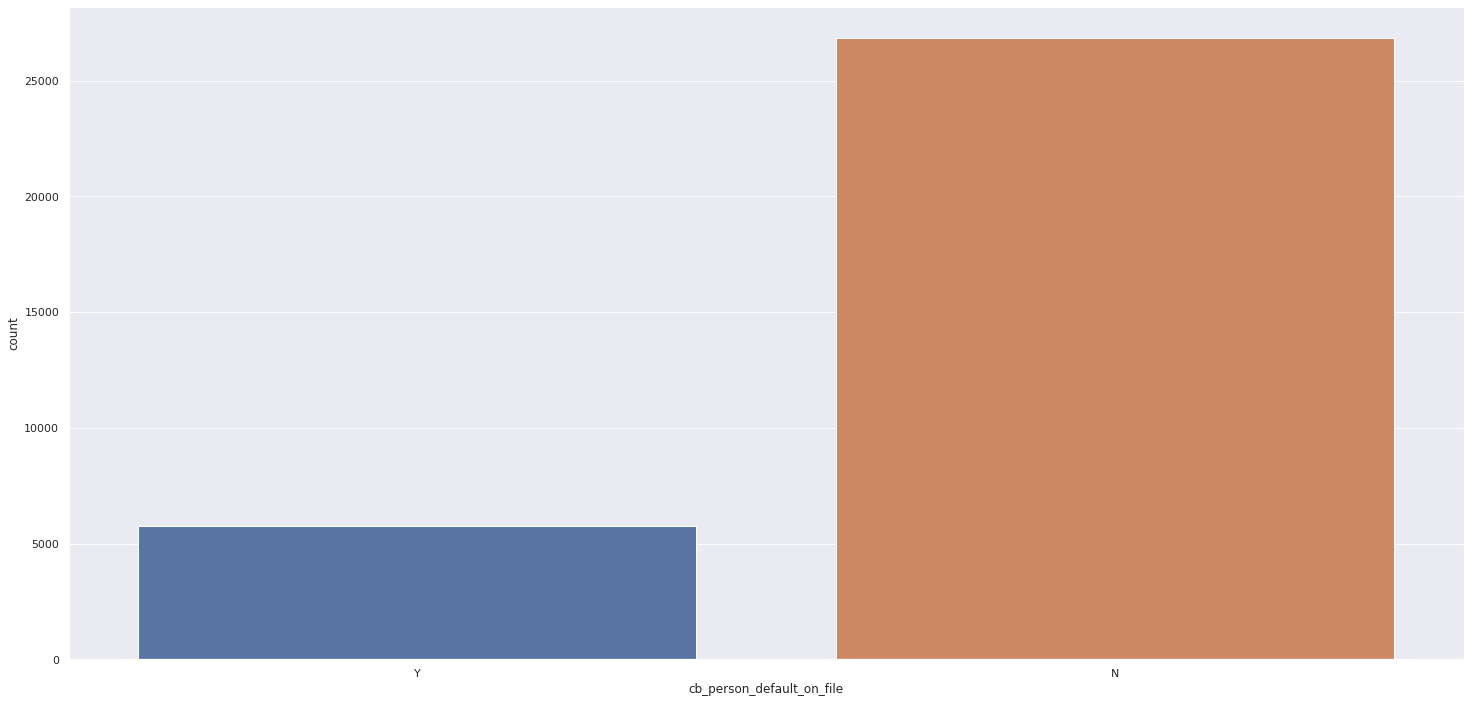

In [61]:
sns.countplot(data = base_credit, x='cb_person_default_on_file');

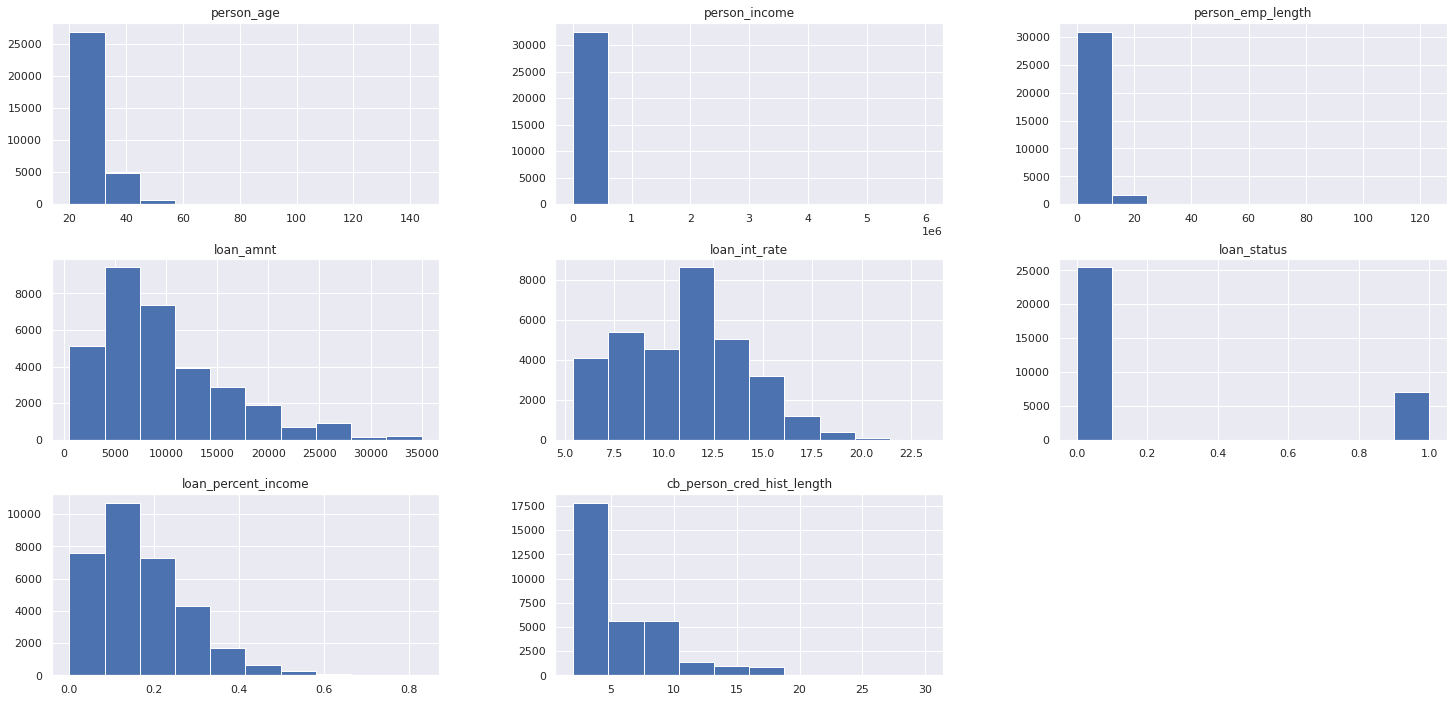

In [62]:
base_credit.hist();

In [143]:
chart = px.scatter_matrix(ax, dimensions=['person_age', 'person_income', 'loan_amnt'], 
                          color='cb_person_default_on_file' )
chart.show()

#### 3.4.1 Inconsistence 

## 4.0 Exploratory Data Analysis

## 5.0 Models

## 6.0 Business Performance

## 7.0 Production

## 8.0 Deployment